In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


In [44]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv',names=['Month','Sale'],header=0)

In [45]:
df.head()

,Month,Sale
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [46]:
df.shape

(107, 2)

In [47]:
df.drop(106,inplace=True)


In [48]:
df.drop(105,inplace=True)

In [49]:
df.head()

,Month,Sale
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [50]:
df['Month']=pd.to_datetime(df['Month'])

In [51]:
df.head()

,Month,Sale
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [55]:
df.set_index('Month',inplace=True)

In [56]:
df

,Sale
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


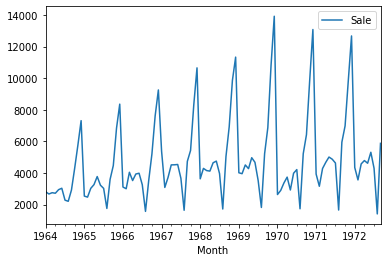

In [57]:
df.plot()

In [69]:
from statsmodels.tsa.stattools import adfuller


In [70]:
#H0:the data is not stationary
#H1:the data is stationary
test_result=df['Sale']

In [83]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#tags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [76]:
adfuller_test(df['Sale'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [78]:
df['Sales first difference']=df['Sale']-df['Sale'].shift(1)

In [79]:
df['Sessonal first difference']=df['Sale']-df['Sale'].shift(12)

In [80]:
df.head()

,Sale,Sales first difference,Sessonal first difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [81]:
adfuller_test(df['Sessonal first difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


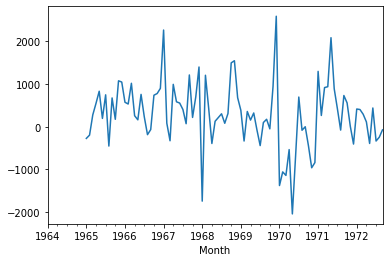

In [82]:
df['Sessonal first difference'].plot()

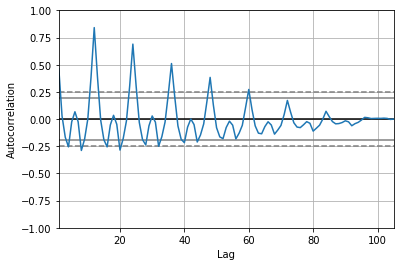

In [88]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sale'])
plt.show()

# Final Thoughts on Autocorrelation and Partial Autocorrelation¶

In [97]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

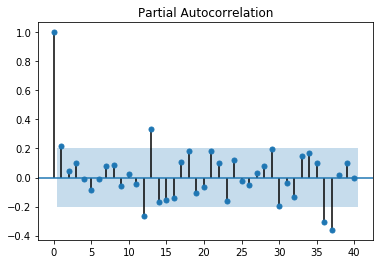

<Figure size 864x576 with 0 Axes>

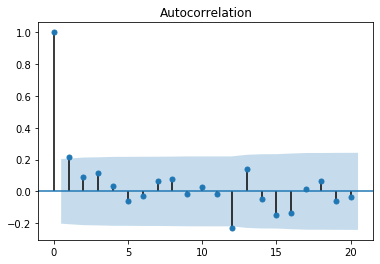

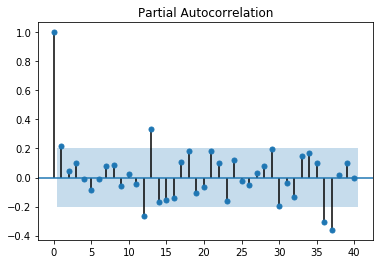

In [103]:
fig = plt.figure(figsize=(12,8))
plot_acf(df['Sessonal first difference'].dropna())#MA
plot_pacf(df['Sessonal first difference'].iloc[13:],lags=40)#AR

In [104]:
from statsmodels.tsa.arima_model import ARIMA

In [110]:
model=ARIMA(df['Sale'],order=(1,1,1))
modefit=model.fit()
modefit.summary()

C:\Users\JESAL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\JESAL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Sale   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 19 Aug 2020   AIC                           1910.251
Time:                        17:39:37   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.7822     12.405      1.836      0.066      -1.532      47.096
ar.L1.D.Sale     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sale    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

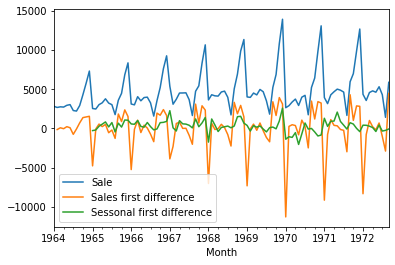

In [108]:
df.plot()

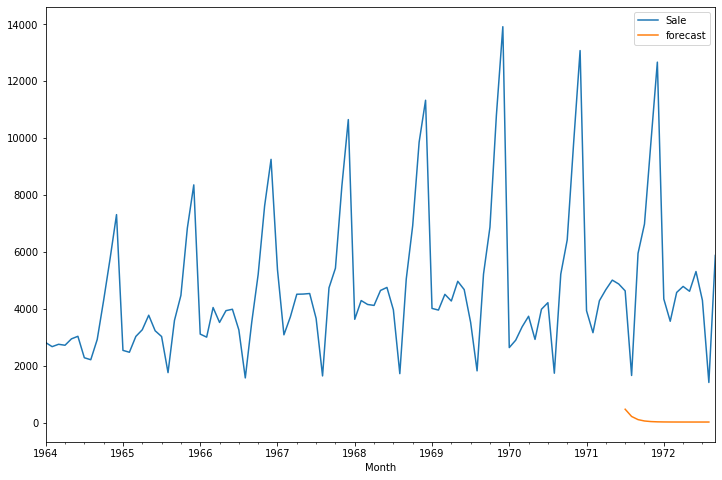

In [113]:
df['forecast']=modefit.predict(start=90,end=103,dynamic=True)
df[['Sale','forecast']].plot(figsize=(12,8))

In [114]:

import statsmodels.api as sm

In [116]:
model=sm.tsa.statespace.SARIMAX(df['Sale'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\JESAL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\JESAL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


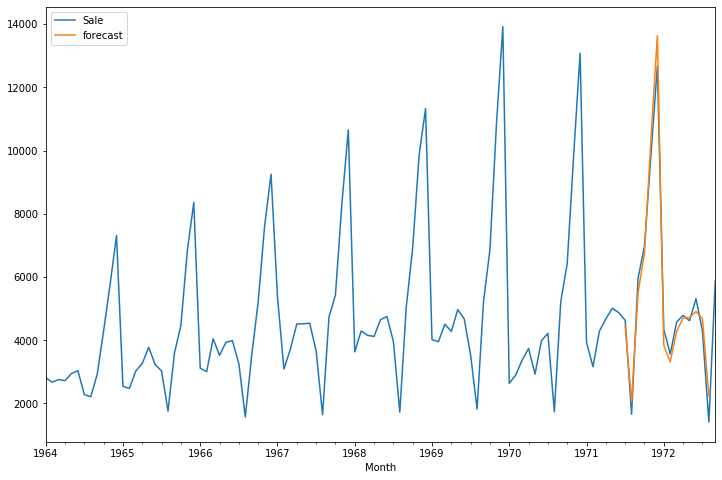

In [117]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sale','forecast']].plot(figsize=(12,8))

In [118]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [119]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [120]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [121]:

future_datest_df.tail()

,Sale,Sales first difference,Sessonal first difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [123]:

future_df=pd.concat([df,future_datest_df])

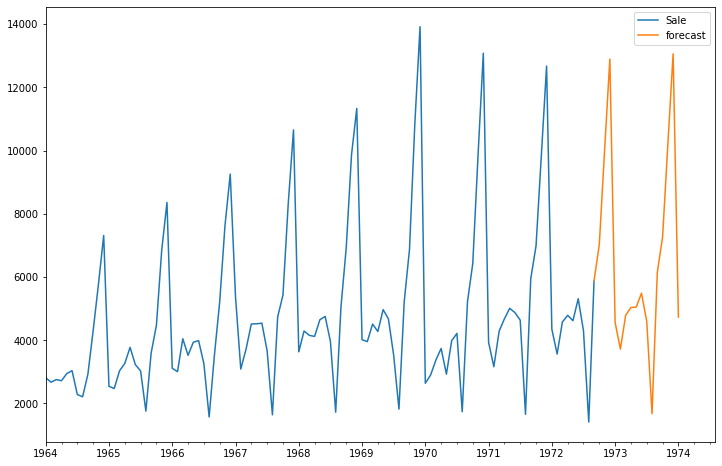

In [125]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sale', 'forecast']].plot(figsize=(12, 8))